# Método por adivinazas o "disparos". 

La forma más fácil de tratar de encontrar una solución a un problema de condiciones a la frontera, es utilizando adivinanzas. Sin embargo, hay que tomar en cuenta que este metodo se vuelve muy ineficiente en generalizaciones a dimensiones mayores y además las soluciones pueden ser muy inestables en muchos casos. En particular, en sistemas no lineales no es un método recomendable. Sin embargo, lo podremos aquí, por cuestiones pedagógicas. 

Supongamos que queremos resolver la ecuación: 

\begin{equation} 
    u''(x) = p(x) u'(x) + q(x) u(x) + r(x),
\end{equation}
y tenemos las condiciones a la frontera $u(x_0) = \alpha$ y $u(x_{N+1}) = \beta$. A diferencia de las ecuaciones de evolución, donde se daban las condiciones iniciales ahora, en vez de tener $u'(x_0) = v_0$, tenemos la condición a la frontera $u(x_{N+1}) = \beta$, donde $N$ es el número de puntos sobre los cuales tendremos una solución. 

Ahora supongamos que obtenemos las soluciones para las ecuaciones: 
\begin{equation} 
    u''(x) = p(x) u'(x) + q(x) u(x) + r(x),
\end{equation}

\begin{equation} 
    u''(x) = p(x) u'(x) + q(x) u(x),
\end{equation}

condiciones iniciales $u(x_0) = \alpha$, $u'(x_0) = 0$ y $u(x_0) = 0$ $u'(x_0) = 1$, $u_1(x)$ y $u_2(x)$ respectivamente. Entonces, podemos verificar facilmente que la solución $u(x) = u_1(x)+ \frac{\beta - u_1(b)}{u_2(b)}u_2(x)$ será una solución para las condiciones de frontera dadas. 

El método del disparo consiste entonces en encontrar ambas soluciones a las condiciones iniciales y con ello obtener la solución a las condiciones de frontera. 

[1] Utiliza esto para hacer una función que utilice el método de disparo. 

In [1]:
using PyPlot
include("Metodos2.jl")

RK4v (generic function with 1 method)

In [2]:
function Disparo(p::Function, q::Function, r::Function, α, β, x0, xN1, N)
    f1(x,t) = p(t)*x[1]+q(t)*x[2]+r(t)
    f2(x,t) = x[1]
    f3(x,t) = p(t)*x[1]+q(t)*x[2]
    α1 = [0, α]
    α2 = [1, 0]
    T, M1 = RK4v(x0,xN1,N,α1,f1,f2)
    T, M2 = RK4v(x0,xN1,N,α2,f3,f2)
    M = M1 + (β-M1[end,2])/(M2[end,2]) *M2
   
    return T, M
end 

Disparo (generic function with 1 method)

Como ejemplo resolveremos la ecuación de tiro parabolico con condiciones a la frontera. 

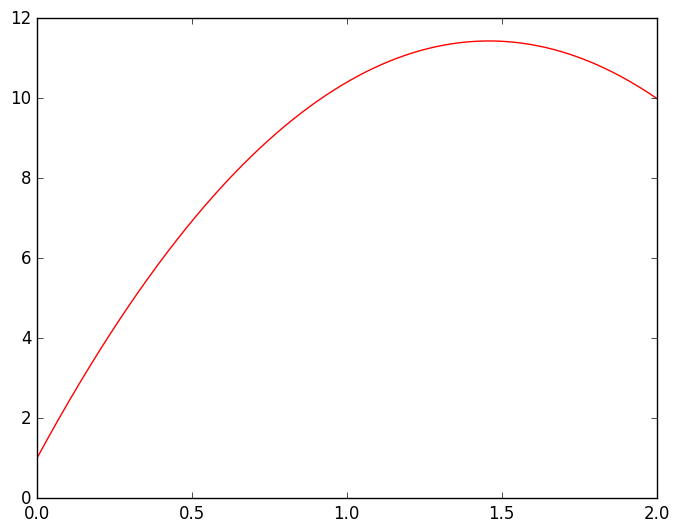

2
2


1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7feb489e5c50>

In [3]:
α= 1
β = 10
x0= 0
xN1 = 2
N = 1000
p(x) = 0
q(x) = 0
r(x) = -9.81
T, M=Disparo(p, q, r, α, β, x0, xN1, N);
plot(T,M[:,2], color="red")


# Método de diferencias finitas

Como ya mencionamos antes, el método de disparo es problemático frecuentemente y además es complicado generalizarlo. Por ello se desarrolló el método de diferencias finitas, que usa las ideas del método de Euler y las técnicas de álgebra matricial. 

Comencemos por analizar el mismo problema de la ecuación: 

\begin{equation} 
    u''(x) = p(x) u'(x) + q(x) u(x) + r(x).
\end{equation}

Recordemos además que haciendo un desarrollo de Tylor podemos obtener la aproximación 

\begin{equation} 
    u''(x_i) = \frac{u(x_{i+1})-2 u(x_i)+ u(x_{i-1})}{h^2} - O(h^2), 
\end{equation}
 y
 
 \begin{equation} 
    u'(x_i) = \frac{u(x_{i+1})- u(x_{i-1})}{2h} - O(h^2)
\end{equation}

Entonces, re-escribiendo la ecuación diferencial y cambiando $u(x_i)$ por $w_i$ para compactar la escritura, tenemos la ecuación: 

 \begin{equation} 
    -\left( 1+\frac{h}{2} p(x_i) \right) w_{i-1} + (2+ h^2 q(x_i)) w_i - \left( 1+\frac{h}{2} p(x_i) \right) w_{i+1} = - h^2 r(x_i), 
\end{equation}

lo cual da un sistema de ecuaciones lineales, que se puede expresar en forma matricial como: 

 \begin{equation} 
A \cdot \vec{w} = \vec{b} 
\end{equation}

donde 


$A=\left[\begin{array}{ccccc}
2+h^{2}q(x_{1}) & -1+\frac{h}{2}p(x_{1}) & 0 & \cdots & 0\\
-1-\frac{h}{2}p(x_{2}) & 2+h^{2}q(x_{2}) & -1+\frac{h}{2}p(x_{2}) & \ddots & \vdots\\
0 & \ddots & \ddots & \ddots & 0\\
\vdots & \ddots & \ddots & \ddots & -1+\frac{h}{2}p(x_{N-1})\\
0 & \cdots & 0 & -1-\frac{h}{2}p(x_{N}) & 2+h^{2}q(x_{N})
\end{array}\right]$

$\vec{b}=\left[\begin{array}{c}
- h^2 r(x_1) + \left( 1+ \frac{h}{2} p(x_1) \right) w_0\\
- h^2 r(x_2)\\
\vdots\\
- h^2 r(x_{N-1})\\
- h^2 r(x_{N} \left( 1- \frac{h}{2} p(x_N) \right) w_{N+1})
\end{array}\right]$, 


$\vec{w}=\left[\begin{array}{c}
w_{1}\\
w2\\
\vdots\\
w_{N-1}\\
w_{N}
\end{array}\right]$, 


Resolviendo este sistema de ecuaciones lineales, obtenemos la solución a nuestra ecuación diferencial. 

[2] Utiliza esto para hacer una función que  resuelva una ecuación diferencial con condiciones a la frontera fijas usando el método de diferencias finitas. 


In [4]:
function Diffinitas(p::Function, q::Function, r::Function, α, β, a, b, N)
    h = (b-a)/(N+1)
    x = a+h
    A = zeros(N,N)
    b = zeros(N)
    A[1,1] = 2 +h^2 *q(x)
    A[1,2] = -1 + h/2 *p(x)
    b[1] = -h^2 *r(x) + (1+ h/2 * p(x))*α 
    
    for i in 2:N-1
        x = a+h*i
        A[i,i-1] = -1 - h/2 *p(x) 
        A[i,i] = 2 +h^2 *q(x)
        A[i,i+1] = -1 + h/2 *p(x)
        b[i] = -h^2 * r(x)
    end
    b[N] = -h^2 *r(x) + (1- h/2 * p(x))*β
    A[N,N] = 2 +h^2 *q(x)
    A[N,N-1] = -1 - h/2 *p(x)
    A1 = inv(A)
    b1 = A1*b
    w = [α]
    append!(w, b1)
    push!(w, β)
    return [a+h*i for i in 0:N+1], w
end

Diffinitas (generic function with 1 method)

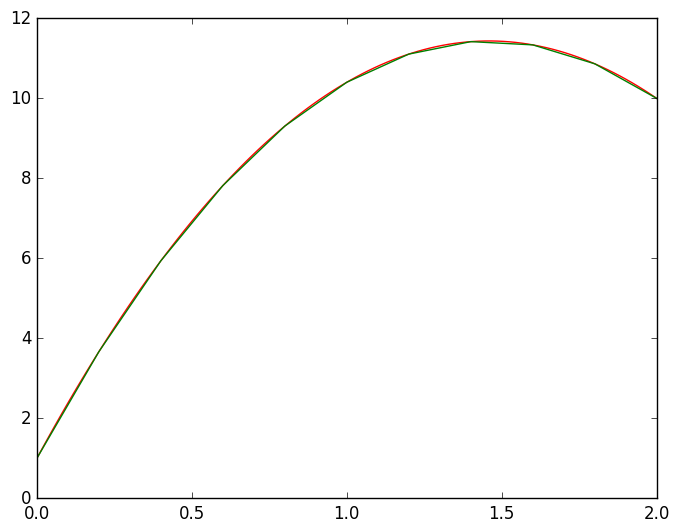

2
2


1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7feb46ffcf90>

In [6]:
α= 1.
β = 10
x0= 0
xN1 = 2
N = 100
p(x) = 0
q(x) = 0
r(x) = -9.81
T, M=Diffinitas(p, q, r, α, β, x0, xN1, N);
plot(T,M, color="red")
T, M=Disparo(p, q, r, α, β, x0, xN1, 10);
plot(T,M[:,2], color="green")



Qué sucede ahora si lo que tenemos es una ecuación diferencial un poco más complicada, digamos 
\begin{equation} 
    u''(x) = f(u', u, x),
\end{equation}
donde $f(u', u, x)$ es cualquier función de $u'$, $u$ y $x$. ¿Cómo podríamos resolver esta ecuación? El problema esta vez es que el sistema de ecuaciones que obtendremos no será un sistema lineal, por lo que no podremos aplicar simplemente el álgebra de matrices. Sin embargo, podemos utilizar el método de Newton para resolver el sistema de ecuaciones no lineales en varias dimensiones. 

Lo primero que necesitamos entonces, es un Método de Newton que resuelva sistemas de ecuaciones no lineales. 

[3] Generaliza aún más el método de Newton de lo que está en el archivo "Metodos2.jl", para que resuelva sistemas de ecuaciones no lineales. 

[4] Utiliza el método de Newton para hacer una función que resuelva una ecuación diferencial no lineal por el método de diferencias finitas. 

[5]Generaliza el método a un sistema de $n$ ecuaciones diferenciales.


In [26]:
function Jacobiano2(F,x0, h=1e-2)
    m = length(x0)  
    n = length(F) 
    df = zeros(n) 
    J = Float64[] 
    for i in 1:m
        for j = 1:n
            df = deriva_vec(F[j],x0,i,h) 
            push!(J,df) 
        end
    end
    return reshape(J,n,m) 
end 
function NewtonSistemas(F, x0; δ=0.00001, h=0.01)
    k = 1
    n = length(F)
    m = length(x0)
    while k<=10000
        FF = []
        for i in 1:n
            push!(FF, F[i](x0))
        end
        J = Jacobiano2(F,x0)
        J2 =  inv(J)
        Y = -J2*FF
        x0 = x0+Y
        if norm(Y)<δ
            return x0
        end
        k +=1
    end
    println("numero maximo de iteraciones excedido")
end
    

NewtonSistemas (generic function with 2 methods)

In [36]:
f(x) = x[1]+2x[2]^2
g(x) = 3x[1]^3+x[2]
F = [f,g]
X = NewtonSistemas(F, [20,3])
f(X), g(X)

(1.1102230246251565e-16,0.0)